This is an EDA on E-commerce data from an online retail store bsaed on actual transactions from 2010 to 2011.

In [113]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import missingno
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# The data set is loaded
df = pd.read_csv('data.csv', delimiter  =',')
df.describe(include= 'all')

# Does not work because it is the wrong unicode. 

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 79780: invalid start byte

In [4]:
# Use chardet to check which unicode it is

import chardet
with open('data.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

Load dataset

In [114]:
# Reload the dataset. Used ascii however, it did not work so tried the following below and it did.
df = pd.read_csv('data.csv', delimiter  =',', encoding= 'ISO-8859-1')
df.describe(include= 'all')

# There are 541909 rows and 8 columns of data however, there is quite a bit missing in the customerID
# and description.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


Check for missing values using visualisation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


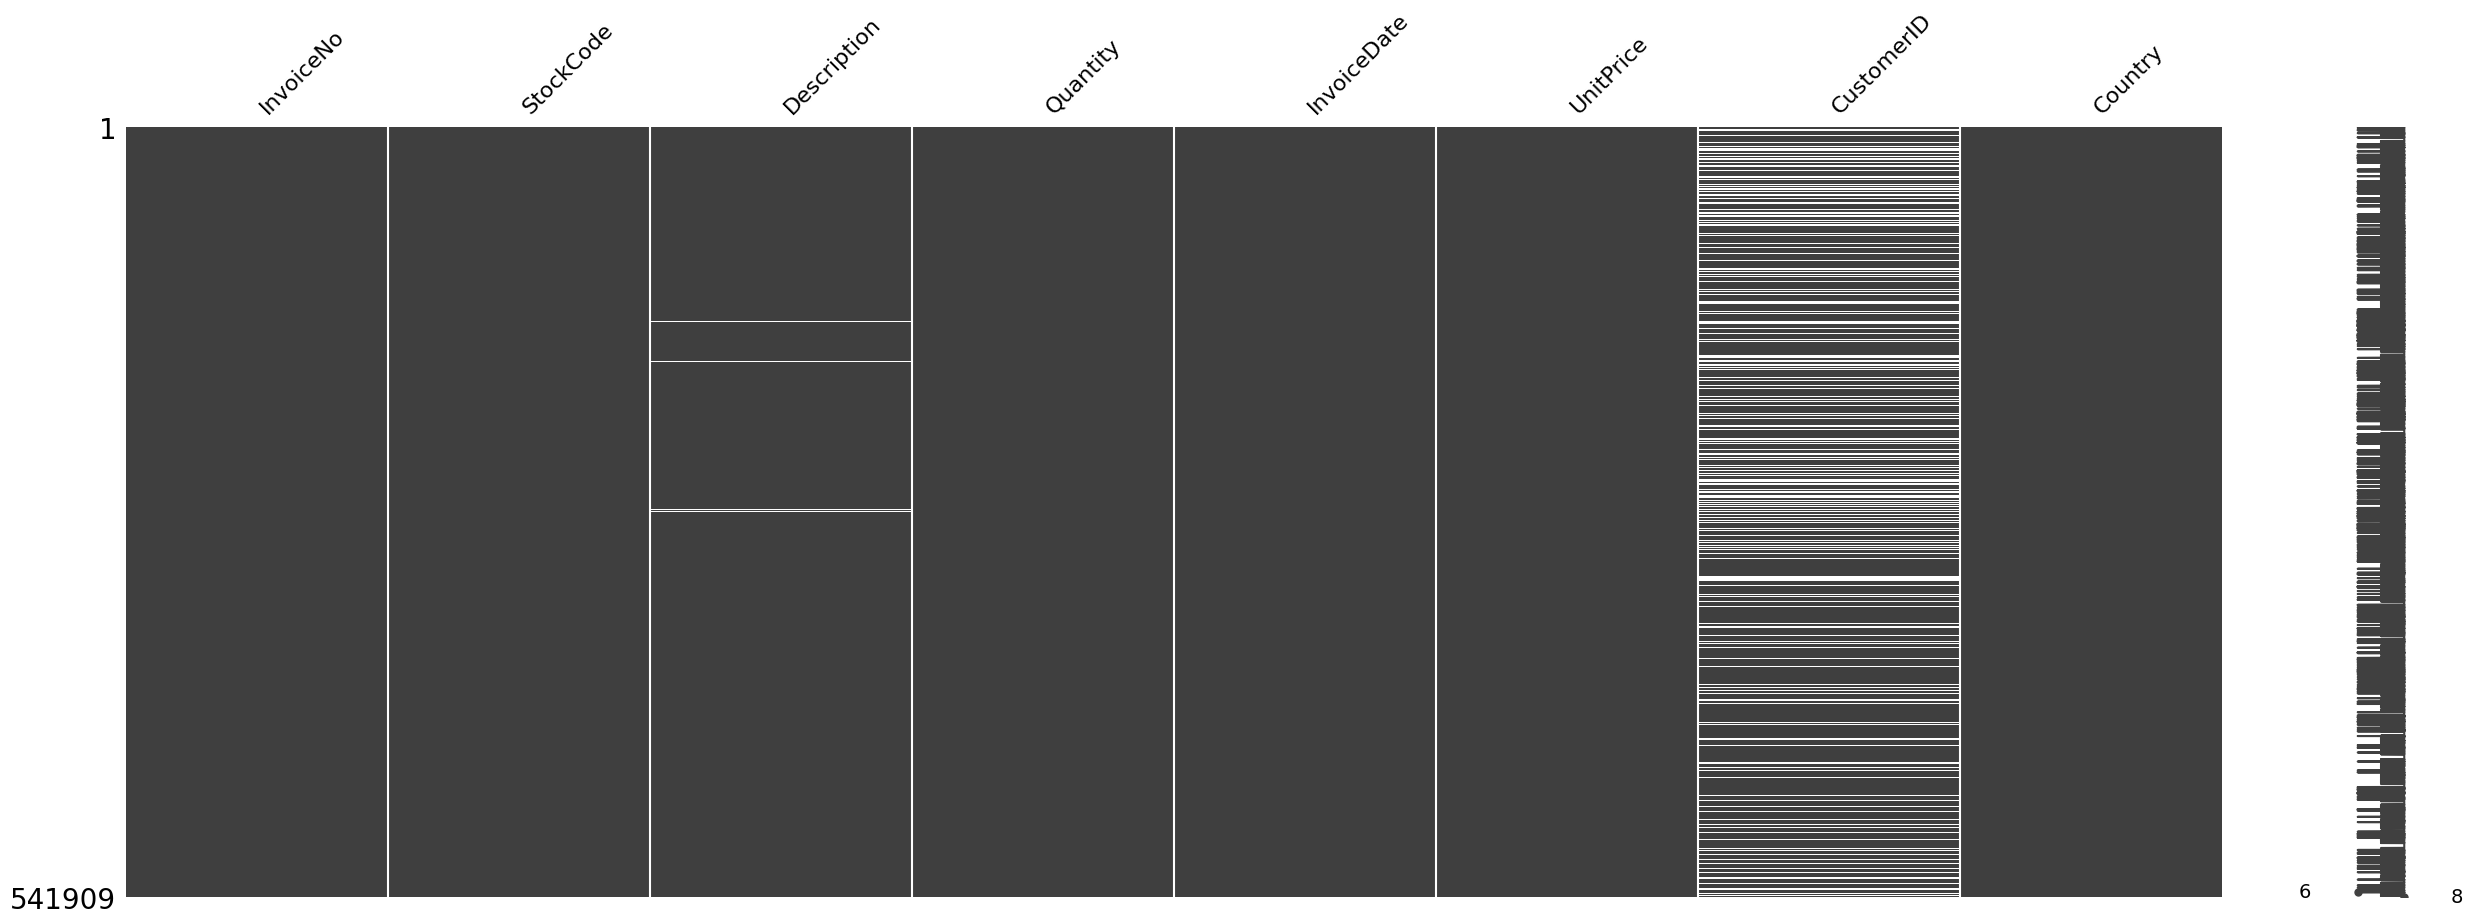

In [115]:
# To check for missing values, the easiest way is to plot a graphic for it.
missingno.matrix(df, figsize = (30,10))
df.info()

In [116]:
# There is quite a lot of data missing from CustomerID. For the purposes of this dataset, it is removed as it adds no value to the EDA.
# Therefore the column is dropped.
# The stockcode is also removed as it is explained by the description column. Also the description column has some missing values, this will be 
# explained later.

df.drop(['CustomerID','StockCode'], inplace=True, axis=1)


In [117]:
# Check number of missing values
missing_values_count = df.isnull().sum()
missing_values_count[0:10]

InvoiceNo         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [118]:
# The number of missing values are now checked.

# Check number of missing values
missing_values_count = df.isnull().sum()
missing_values_count[0:10]

# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

# It appears about 0.4% of the data is missing from description. These missing/blank cells are imputed with 'no description' instead.
df["Description"].fillna("No description", inplace = True)


Check for duplicate entries

In [119]:
# Check for duplicates

duplicate = df[df.duplicated()]
duplicate

# Although these were marked as duplicates, it looks like it is because of the same invoice number and date.
# These are not removed as it represents multiple purchases from a single sale.

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
517,536409,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,United Kingdom
527,536409,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,United Kingdom
537,536409,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,United Kingdom
539,536409,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,United Kingdom
555,536412,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,United Kingdom
...,...,...,...,...,...,...
541675,581538,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,United Kingdom
541689,581538,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,United Kingdom
541692,581538,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,United Kingdom
541699,581538,WICKER STAR,1,12/9/2011 11:34,2.10,United Kingdom


The dtype of the data is checked.

In [40]:
# Now we check that the data is in the right format.
# Notice that invoice data is an object. This needs to be changed into the DateTime format.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   Description  541909 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 24.8+ MB


The InvoiceDate column is changed into date time format

In [41]:
# print the first few rows of the Invoice date column
# Here you can see the data type is an object. And it contains the date and time of transaction.

print(df['InvoiceDate'].head())


0    12/1/2010 8:26
1    12/1/2010 8:26
2    12/1/2010 8:26
3    12/1/2010 8:26
4    12/1/2010 8:26
Name: InvoiceDate, dtype: object


In [43]:
# This is changed to the datetime format and added to the dataframe as release_date_parsed
df['release_date_parsed'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

df['release_date_parsed'].dtype

dtype('<M8[ns]')

In [44]:
# Now the date and time is pulled and appended at the end of the columns
df['year'] = pd.DatetimeIndex(df['release_date_parsed']).year
df['month'] = pd.DatetimeIndex(df['release_date_parsed']).month
df['day'] = pd.DatetimeIndex(df['release_date_parsed']).day
df['time'] = pd.DatetimeIndex(df['release_date_parsed']).time

# To check that it has the correct dtype and it is.
df.info()

When the overview of the data was viewed, it unit price and quantity had negative minimums. Therefore this was investigated.

In [98]:
# Looks like unit price and quantity are in the negative. Firstly we sort the quantity data and check to see why is it negative.

df_quantity = df.sort_values( by = 'Quantity', ascending= True)
df_quantity_less1 = df_quantity[(df_quantity.Quantity <= 0)]
df_quantity_less1

# Looks like Invoice numbers with C in front signify a cancelled order whereas, a numeric invoice number with a negative quantity means it is 
# a refund. When this happens, it looks like the Unit price is 0.

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,release_date_parsed,year,month,day,time
540422,C581484,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,United Kingdom,2011-12-09 09:27:00,2011,12,9,09:27:00
61624,C541433,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,United Kingdom,2011-01-18 10:17:00,2011,1,18,10:17:00
225529,556690,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,United Kingdom,2011-06-14 10:37:00,2011,6,14,10:37:00
225530,556691,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,United Kingdom,2011-06-14 10:37:00,2011,6,14,10:37:00
4287,C536757,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,United Kingdom,2010-12-02 14:23:00,2010,12,2,14:23:00
...,...,...,...,...,...,...,...,...,...,...,...
29052,C538692,HAND OPEN SHAPE DECO.WHITE,-1,12/14/2010 9:58,3.49,United Kingdom,2010-12-14 09:58:00,2010,12,14,09:58:00
363775,C568581,GLASS CLOCHE SMALL,-1,9/28/2011 9:59,3.95,United Kingdom,2011-09-28 09:59:00,2011,9,28,09:59:00
449989,C575150,DOLLY GIRL CHILDRENS CUP,-1,11/8/2011 16:05,1.25,Germany,2011-11-08 16:05:00,2011,11,8,16:05:00
407299,C571856,WHITE HANGING HEART T-LIGHT HOLDER,-1,10/19/2011 13:37,2.95,United Kingdom,2011-10-19 13:37:00,2011,10,19,13:37:00


In [62]:
# This dataframe is made to look at only positive quantities.

df_quantity_positive = df_quantity[(df_quantity.Quantity > 0)]

Looking at unitprice

In [69]:
# This is to check unitprice that are 0
df_unit_price = df.sort_values( by = 'UnitPrice', ascending= True)

df_unit_price[df_unit_price.UnitPrice == 0].value_counts()

InvoiceNo  Description                    Quantity  InvoiceDate       UnitPrice  Country         release_date_parsed  year  month  day  time    
537534     CHILDS GARDEN TROWEL BLUE       1        12/7/2010 11:48   0.0        United Kingdom  2010-12-07 11:48:00  2010  12     7    11:48:00    2
539856     CHILDS GARDEN BRUSH BLUE        1        12/22/2010 14:41  0.0        United Kingdom  2010-12-22 14:41:00  2010  12     22   14:41:00    2
553521     FRENCH BLUE METAL DOOR SIGN 9   2        5/17/2011 14:35   0.0        United Kingdom  2011-05-17 14:35:00  2011  5      17   14:35:00    2
558340     ENAMEL WATERING CAN CREAM       1        6/28/2011 14:01   0.0        United Kingdom  2011-06-28 14:01:00  2011  6      28   14:01:00    2
           MINT KITCHEN SCALES             1        6/28/2011 14:01   0.0        United Kingdom  2011-06-28 14:01:00  2011  6      28   14:01:00    2
                                                                                                         

In [120]:
df_unit_price

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,release_date_parsed,year,month,day,time
299984,A563187,Adjust bad debt,1,8/12/2011 14:52,-11062.06,United Kingdom,2011-08-12 14:52:00,2011,8,12,14:52:00
299983,A563186,Adjust bad debt,1,8/12/2011 14:51,-11062.06,United Kingdom,2011-08-12 14:51:00,2011,8,12,14:51:00
40984,539750,TRAVEL SEWING KIT,1,12/21/2010 15:40,0.00,United Kingdom,2010-12-21 15:40:00,2010,12,21,15:40:00
52217,540696,No description,1,1/11/2011 9:14,0.00,United Kingdom,2011-01-11 09:14:00,2011,1,11,09:14:00
52262,540699,No description,1000,1/11/2011 9:32,0.00,United Kingdom,2011-01-11 09:32:00,2011,1,11,09:32:00
...,...,...,...,...,...,...,...,...,...,...,...
16356,C537651,AMAZON FEE,-1,12/7/2010 15:49,13541.33,United Kingdom,2010-12-07 15:49:00,2010,12,7,15:49:00
43703,C540118,AMAZON FEE,-1,1/5/2011 9:57,16453.71,United Kingdom,2011-01-05 09:57:00,2011,1,5,09:57:00
43702,C540117,AMAZON FEE,-1,1/5/2011 9:55,16888.02,United Kingdom,2011-01-05 09:55:00,2011,1,5,09:55:00
524602,C580605,AMAZON FEE,-1,12/5/2011 11:36,17836.46,United Kingdom,2011-12-05 11:36:00,2011,12,5,11:36:00


In [75]:
# Looks like the first two lines are outliers to the data showing bad debt from a customer. These are removed from the dataset.
df_unit_price_positive = df_unit_price[(df_unit_price.UnitPrice >= 0)]
df_unit_price_positive.shape

(541907, 11)

In [126]:
df_unit_price_positive = df_unit_price_positive.sort_values(by = "UnitPrice", ascending= False)
df_unit_price_positive.head(5)



,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,release_date_parsed,year,month,day,time
222681,C556445,Manual,-1,6/10/2011 15:31,38970.00,United Kingdom,2011-06-10 15:31:00,2011,6,10,15:31:00
524602,C580605,AMAZON FEE,-1,12/5/2011 11:36,17836.46,United Kingdom,2011-12-05 11:36:00,2011,12,5,11:36:00
43702,C540117,AMAZON FEE,-1,1/5/2011 9:55,16888.02,United Kingdom,2011-01-05 09:55:00,2011,1,5,09:55:00
43703,C540118,AMAZON FEE,-1,1/5/2011 9:57,16453.71,United Kingdom,2011-01-05 09:57:00,2011,1,5,09:57:00
16356,C537651,AMAZON FEE,-1,12/7/2010 15:49,13541.33,United Kingdom,2010-12-07 15:49:00,2010,12,7,15:49:00


In [77]:
df.columns

Index(['InvoiceNo', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country', 'release_date_parsed', 'year', 'month', 'day', 'time'],
      dtype='object')

Now that we have cleaned our data, we can start looking at some graphs


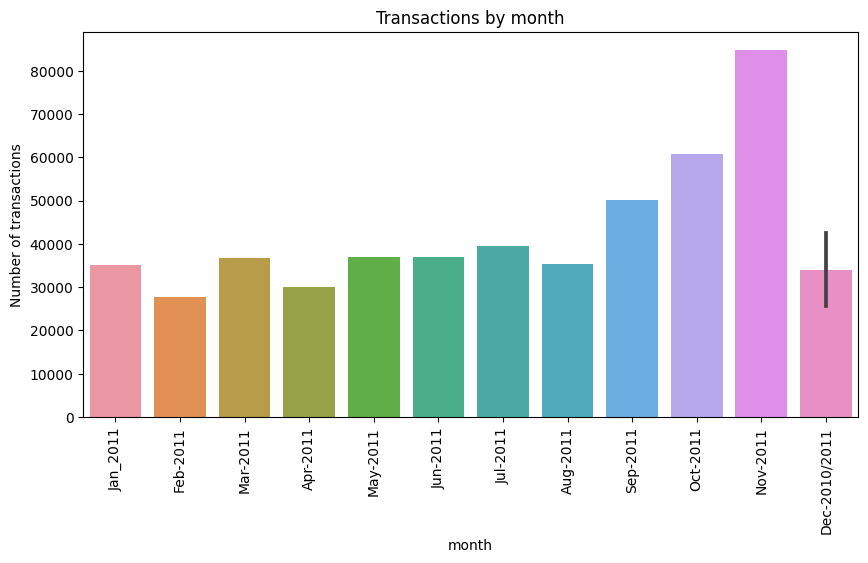

In [99]:
# Looking at sales over the year based on months
df_date = df.groupby(["month", "year"], as_index = False)["InvoiceNo"].count()
plt.figure(figsize = (10,5))

sns.barplot(x = df_date.month, y = df_date.InvoiceNo)
plt.ylabel ("Number of transactions")
plt.title("Transactions by month")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan_2011","Feb-2011","Mar-2011","Apr-2011","May-2011",
                   "Jun-2011", "Jul-2011", "Aug-2011", "Sep-2011", "Oct-2011", "Nov-2011",
                   "Dec-2010/2011"], rotation = 90)
plt.show()

# Looks like the number of transactions peak in October November probably due to sales like black Friday
# And Christmas shopping as these are datasets from wholesalers buying from an online retail store.

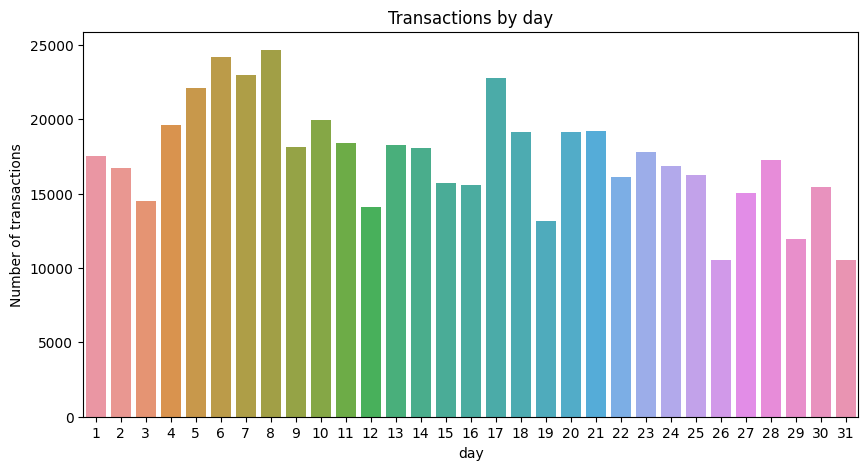

In [86]:
# Looking at sales over the year based on days
df_day = df.groupby(["day"], as_index = False)["InvoiceNo"].count()
plt.figure(figsize = (10,5))

sns.barplot(x = df_day.day, y = df_day.InvoiceNo)
plt.ylabel ("Number of transactions")
plt.title("Transactions by day")
plt.show()

# Looking at the transactions by day, it appears that a number of purchases occur in the beginning and middle of the month
# This is inline with payday.

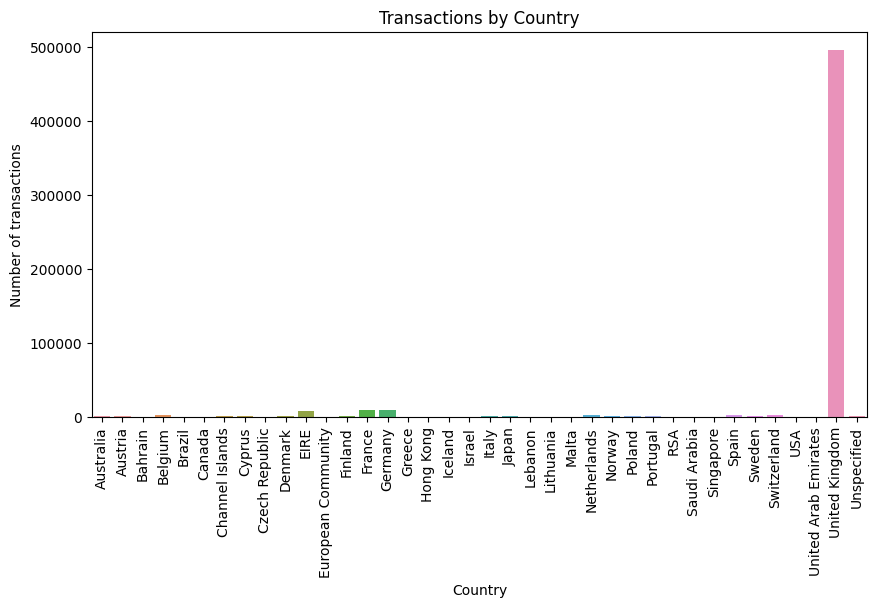

In [92]:
# Looking at sales based on Country
df_country = df.groupby(["Country"], as_index = False)["InvoiceNo"].count()
plt.figure(figsize = (10,5))

sns.barplot(x = df_country.Country, y = df_country.InvoiceNo)
plt.ylabel ("Number of transactions")
plt.title("Transactions by Country")
plt.xticks(rotation = 90)
plt.show()

# Looks like majority of the purchases are from the UK which makes sense as it is a 
# UK based company

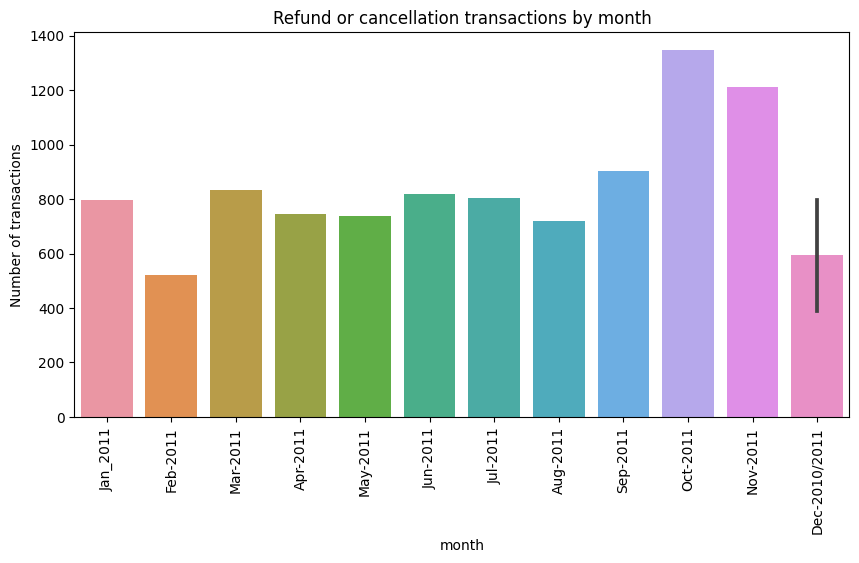

In [101]:
# What about the rate of refunds or cancellations 
df_refunds_cancel = df_quantity_less1.groupby(["month", "year"], as_index = False)["InvoiceNo"].count()
plt.figure(figsize = (10,5))

sns.barplot(x = df_refunds_cancel.month, y = df_refunds_cancel.InvoiceNo)
plt.ylabel ("Number of transactions")
plt.title("Refund or cancellation transactions by month")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan_2011","Feb-2011","Mar-2011","Apr-2011","May-2011",
                   "Jun-2011", "Jul-2011", "Aug-2011", "Sep-2011", "Oct-2011", "Nov-2011",
                   "Dec-2010/2011"], rotation = 90)
plt.show()

# Looks like majority of the refunds or cancellations appear between October and November which coincides with the higher amount of orders during those months






Text(0.5, 1.0, 'Scatterplot of refunds and cancellations against actual purchase invoices')

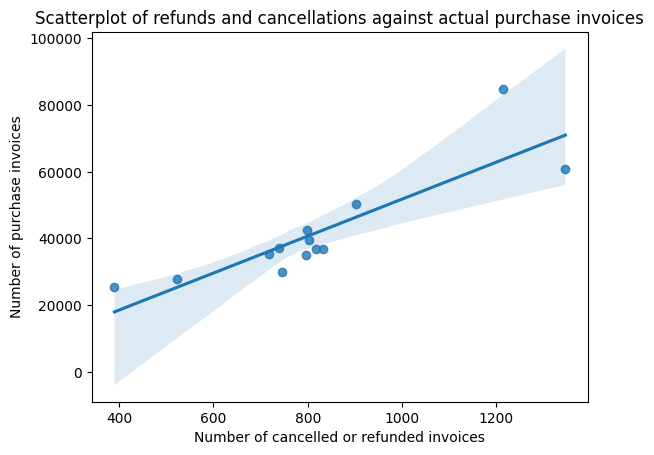

In [138]:
# Checked to see there was a correlation between the number of transactions and the number of cancellations and refunds.

sns.regplot(x = df_refunds_cancel.InvoiceNo, y = df_date.InvoiceNo)
plt.xlabel("Number of cancelled or refunded invoices")
plt.ylabel("Number of purchase invoices")
plt.title("Scatterplot of refunds and cancellations against actual purchase invoices")
# Appears to be a positive correlation. Makes sense as the volume of sales increase, there is bound to have some returns or cancellations of orders.


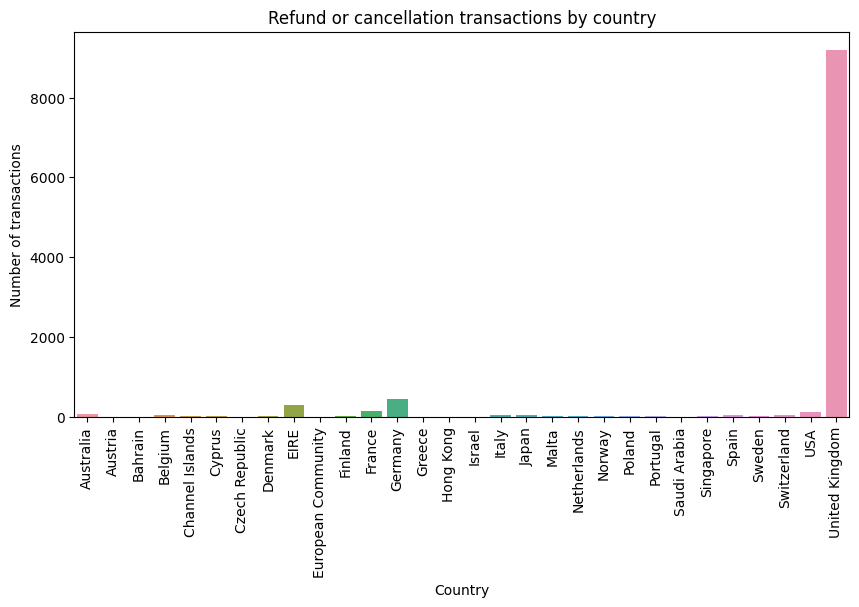

In [102]:
# What about the rate of refunds or cancellations 
df_refunds_cancel_country = df_quantity_less1.groupby(["Country"], as_index = False)["InvoiceNo"].count()
plt.figure(figsize = (10,5))

sns.barplot(x = df_refunds_cancel_country.Country, y = df_refunds_cancel_country.InvoiceNo)
plt.ylabel ("Number of transactions")
plt.title("Refund or cancellation transactions by country")
plt.xticks(rotation = 90)
plt.show()

# Highest number of refunds and cancellations by country is the UK. Probably because it is a UK based company.

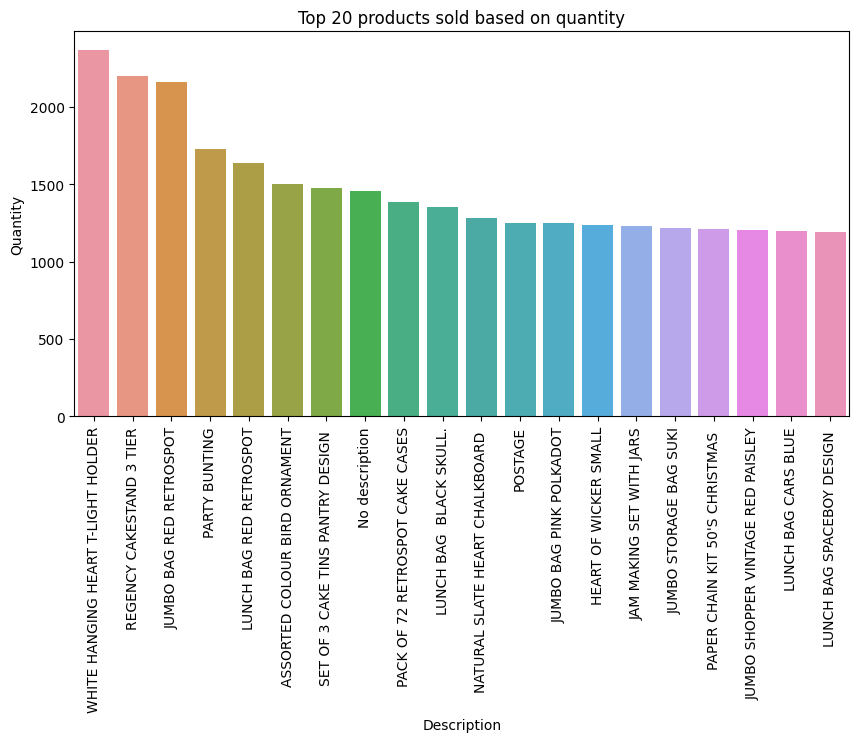

In [137]:
# What about the rate of refunds or cancellations 
df_unitpriceD = df_unit_price_positive.groupby(["Description"], as_index = False)["Quantity"].count().sort_values(by = "Quantity", ascending=False).head(20)
plt.figure(figsize = (10,5))

sns.barplot(x = df_unitpriceD.Description, y = df_unitpriceD.Quantity)
plt.ylabel ("Quantity")
plt.title("Top 20 products sold based on quantity")
plt.xticks(rotation = 90)
plt.show()

#df_unit_price_positive

In [111]:
# What are the most popular products?
#Create a wordcloud from the description column
description1 = " ".join(review for review in df_quantity_positive.Description.astype(str))
print ("There are {} words in the combination of all cells in column description.".format(len(description1)))

There are 14696073 words in the combination of all cells in column description.


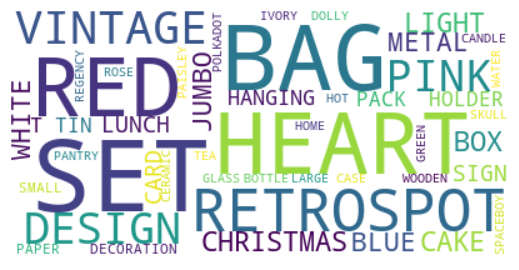

In [112]:
# A word cloud of the most popular products.
from wordcloud import WordCloud
wordcloud = WordCloud(collocations = False, background_color = "white", min_font_size= 10).generate(description1)
plt.figure(figsize= (5,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.margins(x = 0, y = 0)
plt.show()

In [107]:
# What products are returned the most?
# A wordcloud of the returned items 
description = " ".join(review for review in df_quantity_less1.Description.astype(str))
print ("There are {} words in the combination of all cells in column description.".format(len(description)))

There are 265954 words in the combination of all cells in column description.


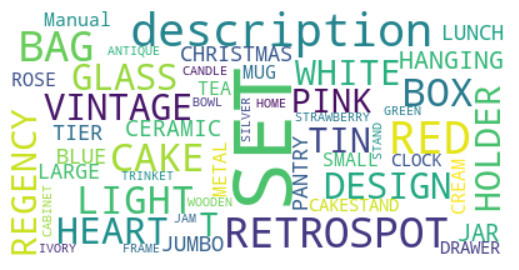

In [108]:
# Create a word cloud of province of the wine
from wordcloud import WordCloud
wordcloud = WordCloud(collocations = False, background_color = "white", min_font_size= 10).generate(description)
plt.figure(figsize= (5,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.margins(x = 0, y = 0)
plt.show()

In [88]:
df.columns

Index(['InvoiceNo', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country', 'release_date_parsed', 'year', 'month', 'day', 'time'],
      dtype='object')